In [33]:
#arbol de desicion
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
os.environ["PATH"] += os.pathsep + 'C:/Users/hug0er/Anaconda3/Library/bin/graphviz'

import graphviz


iris=load_iris()

X_entrena, X_test, y_entrena, y_test=train_test_split(iris.data, iris.target)
iris

Table = pd.read_csv("Meta-table.csv")
Y_partial = Table[["FFNN", "ARIMA", "LSTM"]].values
X = Table[["length","kurtosis","energy","variance"]].values
Y = np.zeros((Y_partial.shape[0]))

for i in range (Y_partial.shape[0]):
    Y[i] = np.argmin(Y_partial[i])
print(Y)

[2. 2. 0. 0. 2. 0. 0. 0. 2. 0. 0. 1.]


In [42]:
Table = pd.read_csv("Meta-table.csv")
Table

,Unnamed: 0,FFNN,ARIMA,LSTM,length,kurtosis,energy,variance
0,Serie 1,0.005078,5.916877e-03,0.003059,144,-0.273837,40.015288,0.020279
1,Serie 2,0.000256,2.411543e-02,0.000078,144,-0.985248,42.355077,0.040459
2,Serie 3,0.000192,1.621666e-02,0.000800,144,0.376218,19.680198,0.050096
3,Serie 4,0.004472,7.839826e-03,0.008395,133,-0.509588,43.374306,0.035002
4,Serie 5,0.002266,4.509146e-03,0.002093,144,-0.130784,44.935531,0.026345
5,Serie 6,0.005344,6.484108e-03,0.008020,144,0.020076,35.754187,0.023340
6,Serie 7,0.000214,1.011986e-02,0.002416,144,-0.247972,35.527638,0.029798
7,Serie 8,0.005912,1.456753e-02,0.006434,134,5.103097,16.174522,0.013026
8,Serie 9,0.000037,1.971197e-03,0.000015,141,1.478852,19.942707,0.031915
9,Serie 10,0.000067,2.559393e-03,0.000469,144,30.417025,8.565773,0.007399


In [43]:
Y


array([2., 2., 0., 0., 2., 0., 0., 0., 2., 0., 0., 1.])

In [35]:
X

array([[ 1.44000000e+02, -2.73836953e-01,  4.00152882e+01,
         2.02793791e-02],
       [ 1.44000000e+02, -9.85247910e-01,  4.23550772e+01,
         4.04593676e-02],
       [ 1.44000000e+02,  3.76218377e-01,  1.96801981e+01,
         5.00962456e-02],
       [ 1.33000000e+02, -5.09587749e-01,  4.33743062e+01,
         3.50016533e-02],
       [ 1.44000000e+02, -1.30784352e-01,  4.49355314e+01,
         2.63453881e-02],
       [ 1.44000000e+02,  2.00758704e-02,  3.57541869e+01,
         2.33401208e-02],
       [ 1.44000000e+02, -2.47971978e-01,  3.55276382e+01,
         2.97982311e-02],
       [ 1.34000000e+02,  5.10309718e+00,  1.61745223e+01,
         1.30259894e-02],
       [ 1.41000000e+02,  1.47885155e+00,  1.99427074e+01,
         3.19149067e-02],
       [ 1.44000000e+02,  3.04170254e+01,  8.56577312e+00,
         7.39934739e-03],
       [ 1.44000000e+02,  3.40040935e-01,  2.26030002e+01,
         2.78349262e-02],
       [ 1.44000000e+02, -1.51613851e+00,  4.75136137e+01,
      

1.0


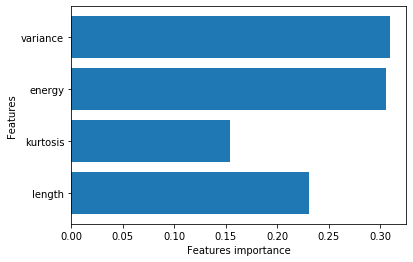

In [40]:
arbol=DecisionTreeClassifier(max_depth=4)
arbol.fit(X, Y)
print(arbol.score(X, Y)) 
caract=X.shape[1]
plt.barh(range(caract),arbol.feature_importances_)
plt.yticks(np.arange(caract),["length","kurtosis","energy","variance"])
plt.xlabel('Features importance')
plt.ylabel('Features')
plt.show()


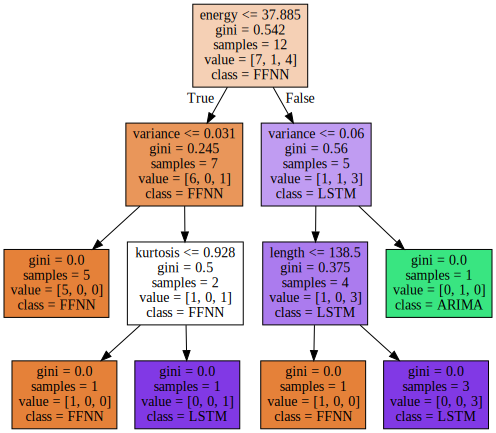

In [41]:
export_graphviz(arbol, out_file='arbol.dot', class_names=['FFNN', 'ARIMA', 'LSTM'],
                feature_names=["length","kurtosis","energy","variance"], impurity=True, filled=True)
with open('arbol.dot') as f:
     dot_graph=f.read()

graphviz.Source(dot_graph)


In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')